**Download** (right-click, save target as ...) this page as a jupyterlab notebook from: [Lab13](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab13/Lab13.ipynb)

___

# <font color=magenta>Laboratory 13: Data Models and Graphing </font>

LAST NAME, FIRST NAME

R00000000

ENGR 1330 Laboratory 13 - In-Lab


In [81]:
# Preamble script block to identify host, user, and kernel
import sys
! hostname
! whoami
print(sys.executable)
print(sys.version)
print(sys.version_info)

atomickitty
sensei
/opt/jupyterhub/bin/python3
3.8.10 (default, Sep 28 2021, 16:10:42) 
[GCC 9.3.0]
sys.version_info(major=3, minor=8, micro=10, releaselevel='final', serial=0)


Example 1

|Methanol Mole Fraction (Liquid Phase)| Methanol Mole Fraction (Vapor Phase) |
|---|---|
|1.0| 1.0 |
|0.882| 0.929 |
|0.765| 0.849 |
|0.653| 0.764 |
|0.545| 0.673 |
|0.443| 0.575 |
|0.344| 0.471 |
|0.25 | 0.359 |
|0.159| 0.241 |
|0.072| 0.114 |
|0.0  | 0.0   |
 
Estimate the vapor mole fraction of methanol corresponding to the liquid mole fraction of methanol of x = 0.15.  

Enter b0 value 0
Enter b1 value 1
Enter b2 value 0


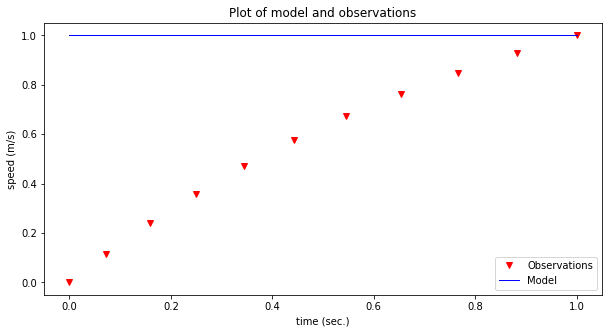

In [82]:
import matplotlib.pyplot as plt
def make2plot(listx1,listy1,listx2,listy2,strlablx,strlably,strtitle):
    mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
    plt.plot(listx1,listy1, c='red', marker='v',linewidth=0) # basic data plot
    plt.plot(listx2,listy2, c='blue',linewidth=1) # basic model plot
    plt.xlabel(strlablx)
    plt.ylabel(strlably)
    plt.legend(['Observations','Model'])# modify for argument insertion
    plt.title(strtitle)
    plt.show()
    return
xtable = [1.0,0.882,0.765,0.653,0.545,0.443,0.344,0.25,0.159,0.072,0]
ytable = [1.0 ,0.929 ,0.849 ,0.764 ,0.673 ,0.575 ,0.471 ,0.359 ,0.241 ,0.114 ,0]
# Create a data model - lets use a power-law model
def powerlaw(b0,b1,b2,x):
    # return y = b0 + b1*x**b2
    powerlaw=b0+b1*x**b2
    return(powerlaw)
# prompt for inputs of b0,b1,b2
# do some trial and error 
intercept=float(input('Enter b0 value'))
linear=float(input('Enter b1 value'))
exponent=float(input('Enter b2 value'))
# build a data model
modelYYY = [] # empty list
for i in range(len(xtable)):
    modelYYY.append(powerlaw(intercept,linear,exponent,xtable[i]))
# Plotting results
make2plot(xtable,ytable,xtable,modelYYY,'time (sec.)','speed (m/s)','Plot of model and observations')

In [77]:
xwant = float(input('Liquid Phase Mole Fraction'))
print('Estimated Vapor Phase Mole Fraction : ',round(powerlaw(intercept,linear,exponent,xwant),3))

Liquid Phase Mole Fraction 0.15


Estimated Vapor Phase Mole Fraction :  0.241


Example 2

|Methanol Mole Fraction (Liquid Phase)| Methanol Mole Fraction (Vapor Phase) |
|---|---|
|1.0| 1.0 |
|0.882| 0.929 |
|0.765| 0.849 |
|0.653| 0.764 |
|0.545| 0.673 |
|0.443| 0.575 |
|0.344| 0.471 |
|0.25 | 0.359 |
|0.159| 0.241 |
|0.072| 0.114 |
|0.0  | 0.0   |
 
Estimate (interpolate) the vapor mole fraction of methanol corresponding to the liquid mole fraction of methanol of x = 0.15.

In [83]:
def lagint(xlist,ylist,xpred): # build an interpolator function
    # lagrangian interpolation of order len(xlist)-1 
    # 
    lagint = 0.0 # ypred is an accumulator, and will be output
    norder = len(xlist)
    for i in range(norder):
        term = ylist[i] # build up terms of polynomial
        for j in range(norder):
            if (i != j):
                term = term * (xpred-xlist[j])/(xlist[i]-xlist[j])
#            pass # may not need this expression
        lagint = lagint + term
#    print(i,j) #debugging expression
    return(lagint)

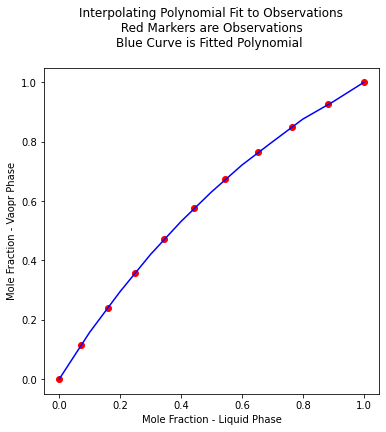

In [84]:
xtable = [1.0,0.882,0.765,0.653,0.545,0.443,0.344,0.25,0.159,0.072,0]
ytable = [1.0 ,0.929 ,0.849 ,0.764 ,0.673 ,0.575 ,0.471 ,0.359 ,0.241 ,0.114 ,0 ]

xpred = [] # empty list to store results for plotting
ypred = [] # empty list to store results for plotting

step_size = 0.1  # step size
how_many = int(1.0/step_size)

# build the predictions
for i in range(how_many+1): 
    xpred.append(float(i)*step_size)
    ypred.append(lagint(xtable,ytable,float(i)*step_size))

    
    #print(lagint(xtable,ytable,xwant))
#print(round(lagint(xtable,ytable,xwant),3))
import matplotlib.pyplot # the python plotting library
myfigure = matplotlib.pyplot.figure(figsize = (6,6)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(xtable, ytable ,color ='red') # The observations as points
matplotlib.pyplot.plot(xpred, ypred, color ='blue') # the polynomial
matplotlib.pyplot.xlabel("Mole Fraction - Liquid Phase") 
matplotlib.pyplot.ylabel("Mole Fraction - Vaopr Phase") 
mytitle = "Interpolating Polynomial Fit to Observations\n "
mytitle += "Red Markers are Observations " + "\n"
mytitle += "Blue Curve is Fitted Polynomial "+ "\n"
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.show()

In [80]:
xwant = float(input('Liquid Phase Mole Fraction'))
print('Estimated Vapor Phase Mole Fraction : ',round(lagint(xtable,ytable,xwant),3))

Liquid Phase Mole Fraction 0.15


Estimated Vapor Phase Mole Fraction :  0.229
